In [1]:
from src.preprocessing import *
import numpy as np
import pandas as pd

In [2]:
files = get_raw_file_paths('off_data_testing/pickle_df')

# Load one dataframe
df = pd.read_pickle(files[0])

In [3]:
subjects = 6
sessions = 2
       
trials = [[[[], [], []]for _ in range(sessions)] for _ in range(subjects)]

for file in files:
    subject = int(file.split('/')[-1][8]) - 1
    session = int(file.split('/')[-1][11]) - 1
    recordings = process_recording(file)

    for recording in recordings:
        if recording[1] == 0:
            trials[subject][session][0].append(recording[0])
        elif recording[1] == 1:
            trials[subject][session][1].append(recording[0])
        elif recording[1] == 2:
            trials[subject][session][2].append(recording[0])

In [4]:
mean_trials = []

for i, subject in enumerate(trials):
    mean_trials.append([])
    for session in subject:
        mean_trials[i].append((
            np.mean(np.array(session[0]), axis=0),
            np.mean(np.array(session[1]), axis=0),
            np.mean(np.array(session[2]), axis=0)
        ))

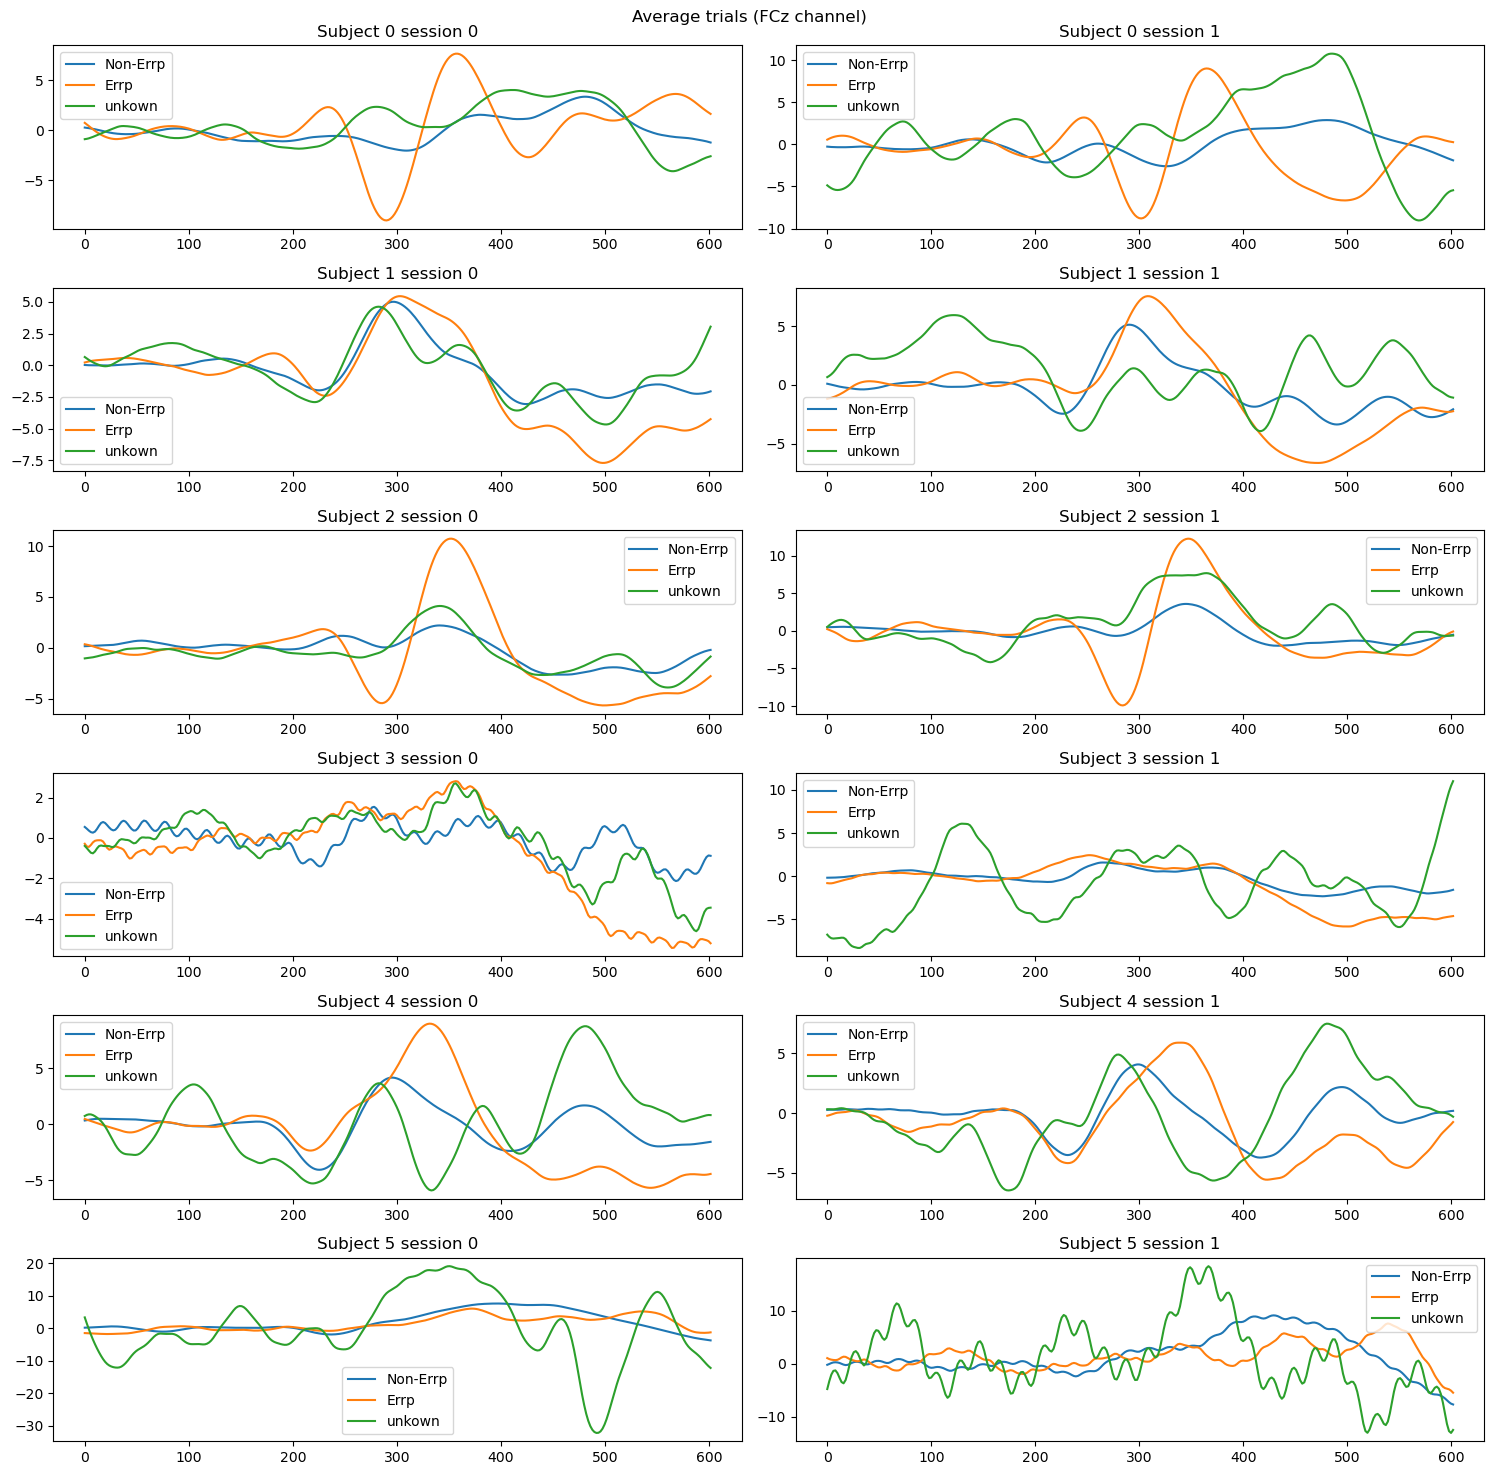

In [6]:
import matplotlib.pyplot as plt

fcz_idx = df.columns.get_loc('FCz')

fcz_len = len(mean_trials[0][0][0][fcz_idx])

duration = fcz_len / 512 * 1000
t = np.linspace(0, duration, fcz_len)

figure, axes = plt.subplots(subjects, sessions, figsize=(15, 15))


for i, subject in enumerate(mean_trials):
    for j, session in enumerate(subject):
        fcz_0 = session[0][fcz_idx]
        fcz_1 = session[1][fcz_idx]
        fcz_2 = session[2][fcz_idx]

        axes[i, j].plot(t, fcz_0, label='Non-Errp')
        axes[i, j].plot(t, fcz_1, label='Errp')
        axes[i, j].plot(t, fcz_2, label='unkown')
        axes[i, j].set_title('Subject {subject} session {session}'.format(subject=i, session=j))
        axes[i, j].legend()

figure.suptitle("Average trials (FCz channel)")       
figure.tight_layout()

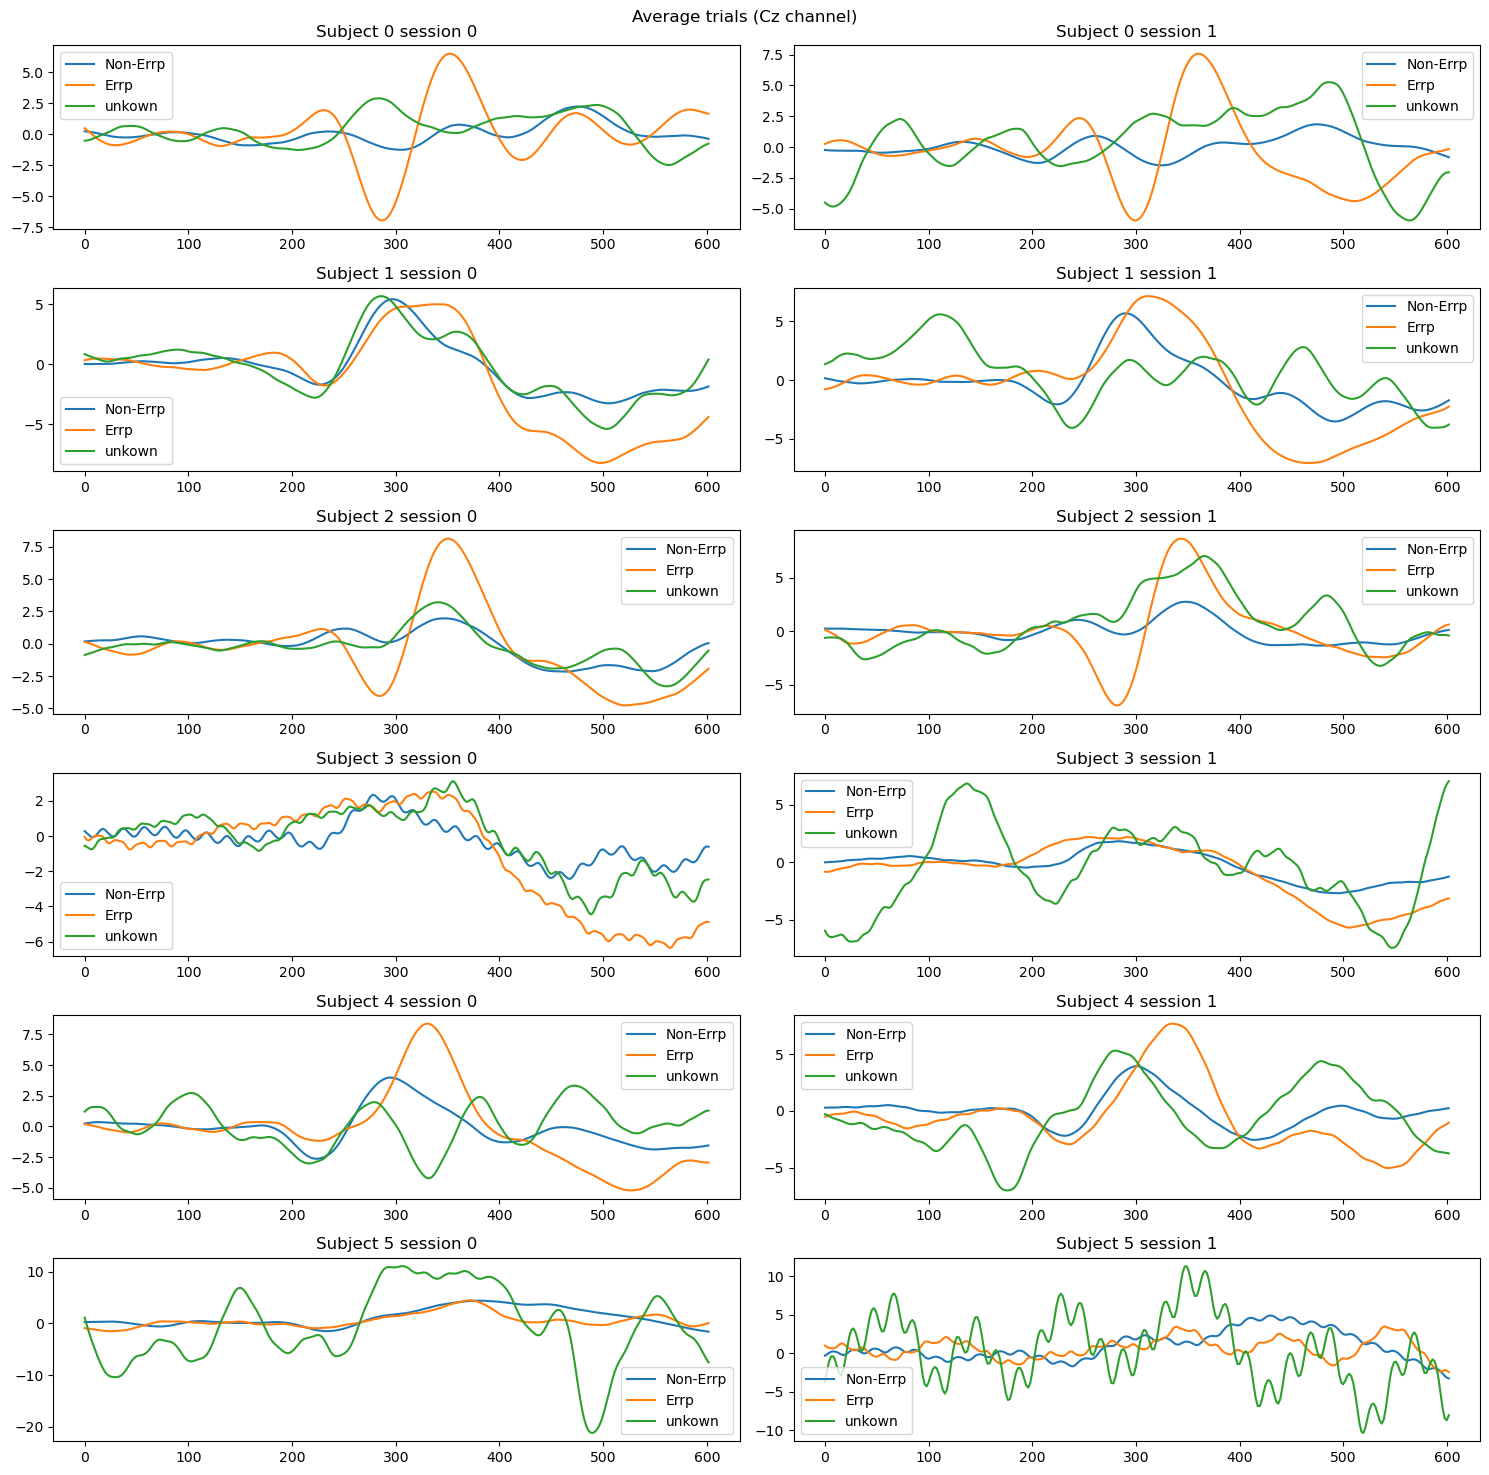

In [14]:
cz_idx = df.columns.get_loc('Cz')
figure, axes = plt.subplots(subjects, sessions, figsize=(15, 15))

for i, subject in enumerate(mean_trials):
    for j, session in enumerate(subject):
        cz_0 = session[0][cz_idx]
        cz_1 = session[1][cz_idx]
        cz_2 = session[2][cz_idx]

        axes[i, j].plot(t, cz_0, label='Non-Errp')
        axes[i, j].plot(t, cz_1, label='Errp')
        axes[i, j].plot(t, cz_2, label='unkown')
        axes[i, j].set_title('Subject {subject} session {session}'.format(subject=i, session=j))
        axes[i, j].legend()

figure.suptitle("Average trials (Cz channel)")       
figure.tight_layout()

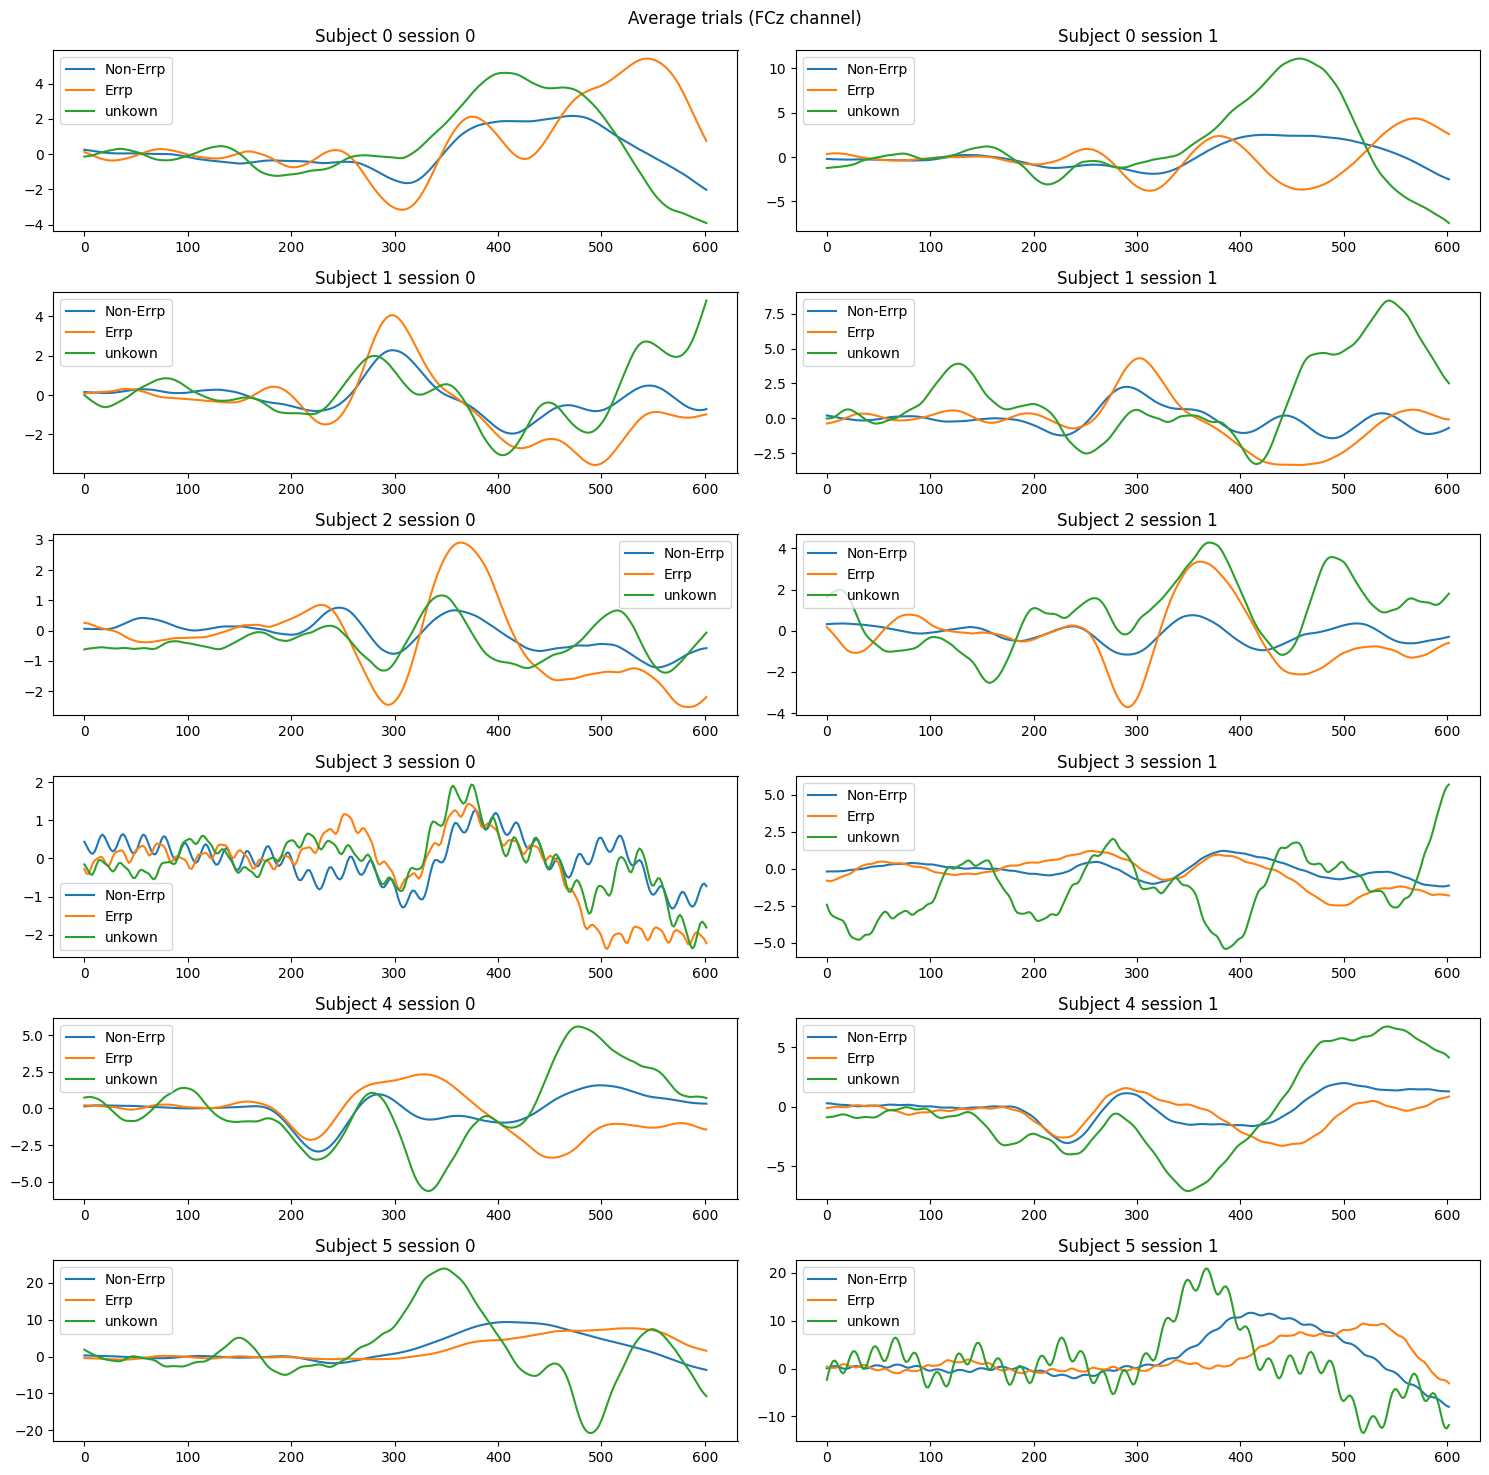

In [23]:
figure, axes = plt.subplots(subjects, sessions, figsize=(15, 15))


for i, subject in enumerate(mean_trials):
    for j, session in enumerate(subject):
        signal_0 = np.mean(session[0], axis=0)
        signal_1 = np.mean(session[1], axis=0)
        signal_2 = np.mean(session[2], axis=0)

        axes[i, j].plot(t, signal_0, label='Non-Errp')
        axes[i, j].plot(t, signal_1, label='Errp')
        axes[i, j].plot(t, signal_2, label='unkown')
        axes[i, j].set_title('Subject {subject} session {session}'.format(subject=i, session=j))
        axes[i, j].legend()

figure.suptitle("Average trials (average of all channels)")       
figure.tight_layout()